In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/train.csv')


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

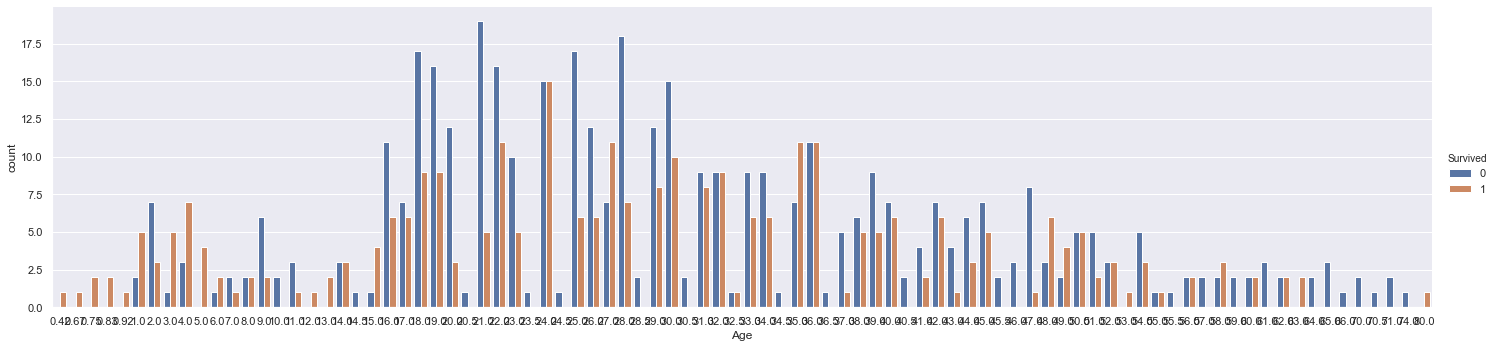

In [3]:
sns.catplot(data = df, x = 'Age', hue = 'Survived', kind = 'count', aspect = 4)

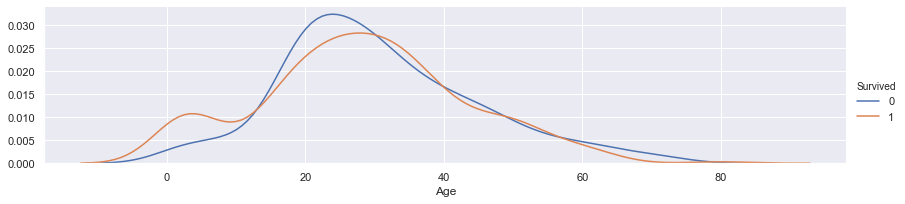

In [4]:
facet = sns.FacetGrid(df, hue = "Survived", aspect =4)
facet.map(sns.kdeplot, "Age")
facet.add_legend()

plt.show()
#연령대에 따라 생존과 사망을 상기 그래프보다 더 시각적으로 효과적으로 전달할 수 있다

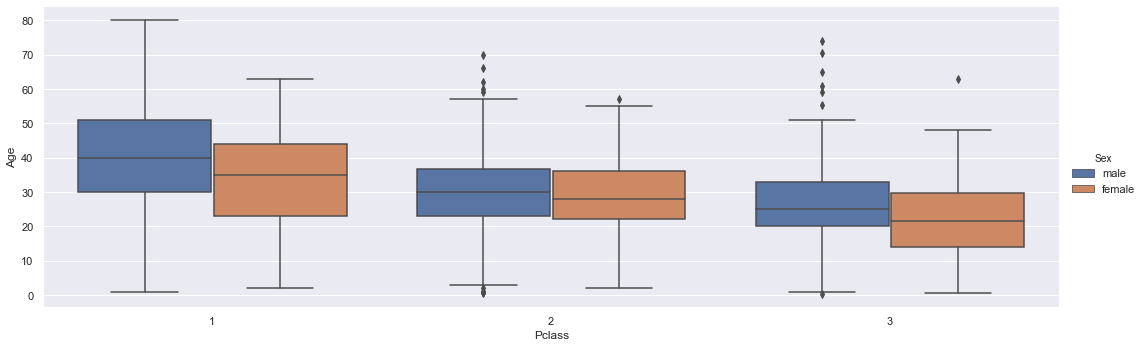

In [5]:
sns.catplot(data = df, x = 'Pclass',y='Age', hue = 'Sex', kind = 'box', aspect = 3)
#boxplot 은 중간값, 값의 가중치 등을 살펴보기 쉽다

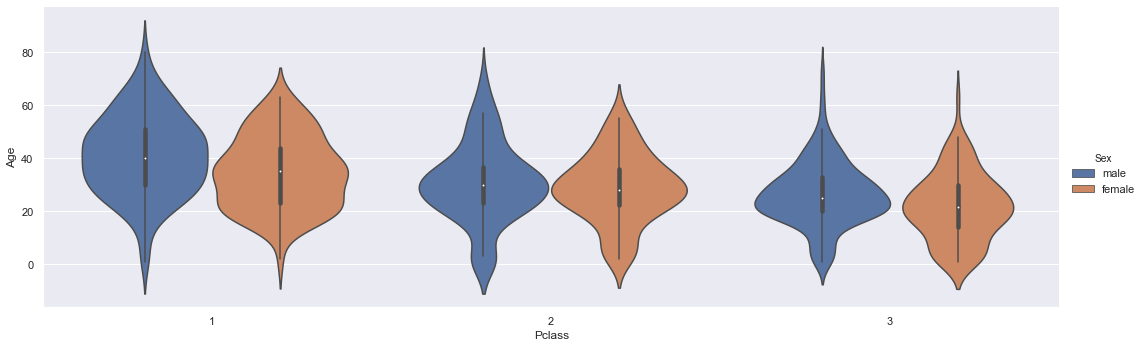

In [6]:
sns.catplot(data = df, x = 'Pclass',y='Age', hue = 'Sex', kind = 'violin', aspect = 3)
#kind를 violin으로 바꾸면 어느 부분에 분포가 더 밀집되어 있는지 box보다 좀더 시각적/직관적으로 알 수 있다

In [8]:
"""Random Forest와 Ensemble 기법"""
#우선 트리를 형성:

import pandas as pd

df = pd.read_csv('data/train.csv')
df.head(10)

# 생존여부에 critical하게 영향을 끼칠 것으로 예상되는 요소들

df[['Sex', 'Age', 'SibSp', 'Parch']].head()

,Sex,Age,SibSp,Parch
0,male,22.0,1,0
1,female,38.0,1,0
2,female,26.0,0,0
3,female,35.0,1,0
4,male,35.0,0,0


In [9]:
# 테스트셋

df_test = pd.read_csv('data/test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [11]:
 #전체 나이 평균, 즉 df['Age'].mean()을 빈칸에 넣기

df['Age'] = df ['Age'].fillna(df['Age'].mean())
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
df_test['Age'] = df_test['Age'].fillna(df_test['Age'].mean())
# Age의 범위 묶어주기 in training set (feature engineering)

df.loc[df['Age'] < 10, 'Age'] = 0
df.loc[(df['Age'] >= 10) &  (df['Age'] < 20), 'Age'] = 1
df.loc[(df['Age'] >= 20) &  (df['Age'] < 30), 'Age'] = 2
df.loc[(df['Age'] >= 30) &  (df['Age'] < 40), 'Age'] = 3
df.loc[(df['Age'] >= 40) &  (df['Age'] < 50), 'Age'] = 4
df.loc[df['Age'] >= 50, 'Age'] = 5

In [13]:
# Age의 범위 묶어주기 in test set (feature engineering)

df_test.loc[df_test['Age'] < 10, 'Age'] = 0
df_test.loc[(df_test['Age'] >= 10) &  (df_test['Age'] < 20), 'Age'] = 1
df_test.loc[(df_test['Age'] >= 20) &  (df_test['Age'] < 30), 'Age'] = 2
df_test.loc[(df_test['Age'] >= 30) &  (df_test['Age'] < 40), 'Age'] = 3
df_test.loc[(df_test['Age'] >= 40) &  (df_test['Age'] < 50), 'Age'] = 4
df_test.loc[df_test['Age'] >= 50, 'Age'] = 5

In [14]:
# train의 형재자매수와 부모수를 합치기

df['FamilySize'] = df['SibSp'] + df['Parch']
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,2.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,3.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,3.0,0,0,373450,8.0500,NaN,S,0


In [15]:

df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch']
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,892,3,"Kelly, Mr. James",male,3.0,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,4.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,5.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,2.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,2.0,1,1,3101298,12.2875,NaN,S,2


In [16]:
train = df[['Survived', 'Sex', 'Age', 'FamilySize']]
test = df_test[['Sex', 'Age', 'FamilySize']] # test 데이터는 애초에 Survived가 없음

train.head()

,Survived,Sex,Age,FamilySize
0,0,male,2.0,1
1,1,female,3.0,1
2,1,female,2.0,0
3,1,female,3.0,1
4,0,male,3.0,0


In [17]:

df['Fare'] = df ['Fare'].fillna(df['Fare'].mean())
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,2.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,3.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,3.0,0,0,373450,8.0500,NaN,S,0


In [18]:
df_test['Fare'] = df_test ['Fare'].fillna(df_test['Fare'].mean())
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,892,3,"Kelly, Mr. James",male,3.0,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,4.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,5.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,2.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,2.0,1,1,3101298,12.2875,NaN,S,2


In [19]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
FamilySize       0
dtype: int64

In [20]:
df_test.isnull().sum()


PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
FamilySize       0
dtype: int64

In [21]:
# value 요약 보기

df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [22]:
df['Embarked'] = df['Embarked'].fillna('S')
df_test['Embarked'] = df_test['Embarked'].fillna('S')


In [23]:
train = df[['Survived', 'Sex', 'Age', 'FamilySize', 'Fare', 'Embarked']]

train.head()

,Survived,Sex,Age,FamilySize,Fare,Embarked
0,0,male,2.0,1,7.2500,S
1,1,female,3.0,1,71.2833,C
2,1,female,2.0,0,7.9250,S
3,1,female,3.0,1,53.1000,S
4,0,male,3.0,0,8.0500,S


In [24]:
df.loc[df['Sex'] == 'male', 'Sex'] = 0
df.loc[df['Sex'] == 'female', 'Sex'] = 1

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",0,2.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",1,2.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,3.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",0,3.0,0,0,373450,8.0500,NaN,S,0


In [25]:
df_test.loc[df_test['Sex'] == 'male', 'Sex'] = 0
df_test.loc[df_test['Sex'] == 'female', 'Sex'] = 1

df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,892,3,"Kelly, Mr. James",0,3.0,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,4.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",0,5.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",0,2.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,2.0,1,1,3101298,12.2875,NaN,S,2


In [26]:
df.loc[df['Embarked'] == 'S', 'Embarked'] = 0
df.loc[df['Embarked'] == 'C', 'Embarked'] = 1
df.loc[df['Embarked'] == 'Q', 'Embarked'] = 2

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",0,2.0,1,0,A/5 21171,7.2500,NaN,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,PC 17599,71.2833,C85,1,1
2,3,1,3,"Heikkinen, Miss. Laina",1,2.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,3.0,1,0,113803,53.1000,C123,0,1
4,5,0,3,"Allen, Mr. William Henry",0,3.0,0,0,373450,8.0500,NaN,0,0


In [27]:
df_test.loc[df_test['Embarked'] == 'S', 'Embarked'] = 0
df_test.loc[df_test['Embarked'] == 'C', 'Embarked'] = 1
df_test.loc[df_test['Embarked'] == 'Q', 'Embarked'] = 2

df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,892,3,"Kelly, Mr. James",0,3.0,0,0,330911,7.8292,NaN,2,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,4.0,1,0,363272,7.0000,NaN,0,1
2,894,2,"Myles, Mr. Thomas Francis",0,5.0,0,0,240276,9.6875,NaN,2,0
3,895,3,"Wirz, Mr. Albert",0,2.0,0,0,315154,8.6625,NaN,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,2.0,1,1,3101298,12.2875,NaN,0,2


In [28]:
train = df[['Survived', 'Sex', 'Age', 'FamilySize','Fare', 'Embarked']]
test = df_test[['Sex', 'Age', 'FamilySize','Fare', 'Embarked']] # test 데이터는 애초에 Survived가 없음

train.head()

,Survived,Sex,Age,FamilySize,Fare,Embarked
0,0,0,2.0,1,7.2500,0
1,1,1,3.0,1,71.2833,1
2,1,1,2.0,0,7.9250,0
3,1,1,3.0,1,53.1000,0
4,0,0,3.0,0,8.0500,0


In [29]:
x_train = train[['Sex', 'Age', 'FamilySize', 'Fare', 'Embarked']]
y_train = train['Survived'] # 선택할 열이 하나면, []를 한번만 써준다.

x_train

,Sex,Age,FamilySize,Fare,Embarked
0,0,2.0,1,7.2500,0
1,1,3.0,1,71.2833,1
2,1,2.0,0,7.9250,0
3,1,3.0,1,53.1000,0
4,0,3.0,0,8.0500,0
...,...,...,...,...,...
886,0,2.0,0,13.0000,0
887,1,1.0,0,30.0000,0
888,1,2.0,3,23.4500,0
889,0,2.0,0,30.0000,1


In [30]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree로 모델을 만들기
tree = DecisionTreeClassifier()

# 학습하기
tree.fit(x_train, y_train)

# 학습된 모델로 X_train의 결과를 얻어내고 y_train의 답과 비교하여 정확도 측정

print('training set accuracy :', tree.score(x_train, y_train) )

training set accuracy : 0.9450056116722784


In [31]:
x_test = test[['Sex', 'Age', 'FamilySize', 'Fare', 'Embarked']]

x_test

,Sex,Age,FamilySize,Fare,Embarked
0,0,3.0,0,7.8292,2
1,1,4.0,1,7.0000,0
2,0,5.0,0,9.6875,2
3,0,2.0,0,8.6625,0
4,1,2.0,2,12.2875,0
...,...,...,...,...,...
413,0,3.0,0,8.0500,0
414,1,3.0,0,108.9000,1
415,0,3.0,0,7.2500,0
416,0,3.0,0,8.0500,0


In [32]:
prediction = tree.predict(x_test) # 이를 통해 즉 y_test가 만들어집니다

prediction

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [33]:
# submit = pd.DataFrame({
#     'PassengerId' : df_test['PassengerId'],
#     'Survived' : prediction
# })

# submit.to_csv('submit.csv', index = False)
my_prediction = pd.read_csv('submit.csv')
my_prediction

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [34]:
"""위에까지가 DecisionTree기법"""
"""아래부터 DecisionTree의 Overfitting을 방지하기 위한 RandomForest 기법"""

from sklearn.tree import DecisionTreeClassifier

tree1 = DecisionTreeClassifier()
tree1.fit(x_train, y_train)

print('training set accuracy:', tree1.score(x_train, y_train))

tree2 = DecisionTreeClassifier()
tree2.fit(x_train, y_train)

print('training set accuracy:', tree2.score(x_train, y_train))

tree3 = DecisionTreeClassifier()
tree3.fit(x_train, y_train)

print('training set accuracy:', tree3.score(x_train, y_train))
#여러개의 tree를 만든다 -- 아직은 전부 같은 tree이므로 같은 정확성이 나온다

training set accuracy: 0.9450056116722784
training set accuracy: 0.9450056116722784
training set accuracy: 0.9450056116722784


In [35]:
# 앞 쪽 100개만 validation set으로 지정하기
x_valid = x_train[0:100]
y_valid = y_train[0:100]

# 앞 100개 데이터를 제외한 남은 부분을 다시 trainset으로 재정의
x_train = x_train[100:]
y_train = y_train[100:]


In [36]:
# 100개의 데이터를 제외한 x_train, y_train를 다시 훈련시켜줍니다.
tree1.fit(x_train, y_train)

print('training set accuracy:', tree1.score(x_train, y_train))
print('validation set accuracy:', tree1.score(x_valid, y_valid))

tree2 = DecisionTreeClassifier()
tree2.fit(x_train, y_train)

print('training set accuracy:', tree2.score(x_train, y_train))
print('validation set accuracy:', tree2.score(x_valid, y_valid))

tree3 = DecisionTreeClassifier()
tree3.fit(x_train, y_train)

print('training set accuracy:', tree3.score(x_train, y_train))
print('validation set accuracy:', tree3.score(x_valid, y_valid))
#학습한 데이터에서는 높은 정확도를 보이지만, 상이한 데이터를 넣으니 점수가 떨어진 것을 알 수 있다-- DecisionTree의 단점

training set accuracy: 0.9443742098609356
validation set accuracy: 0.78
training set accuracy: 0.9443742098609356
validation set accuracy: 0.79
training set accuracy: 0.9443742098609356
validation set accuracy: 0.78


In [37]:
#따라서 DecisionTree를 Ensemble하면:
prediction1 = tree1.predict(test)
prediction2 = tree2.predict(test)
prediction3 = tree3.predict(test)

ensemble = (prediction1 + prediction2 + prediction3)/3 #사실 ensemble이라고 별거 없고 다 더해서 평균낸것 ㅎ
ensemble[ensemble>0.5] = 1
ensemble[ensemble<=0.5] = 0

ensemble = ensemble.astype(int)
#대신 이걸 후처리 -- 평균내면 float이 되니깐 int로 바꾸어준다--from math import ceil,등등
ensemble

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,

In [41]:
submit = pd.DataFrame({
    'PassengerId' : df_test['PassengerId'],
    'Survived' : ensemble
})
submit.to_csv('KUCC_submit_ensemble201128.csv', index = False)

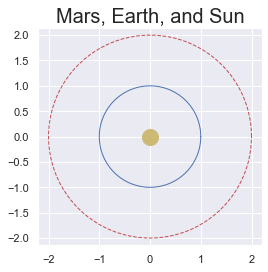

In [44]:

#Task 2 (optional, extra credits)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation  # we need this to create an animation with matplotlib
from IPython.display import HTML  # we need this to show the animation with a control panel 

fig = plt.figure(figsize=(4,4))
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.plot(0,0,'yo',markersize=16)

r_Earth = 1
r_mars = 2

Earth_orbit = np.linspace(0,2*np.pi, 100)
mars_orbit = np.linspace(0,2*np.pi, 100)

x_Earth = r_Earth*np.cos(Earth_orbit)
y_Earth = r_Earth*np.sin(Earth_orbit)
plt.plot(x_Earth, y_Earth, 'b',lw=1)


x_mars = r_mars*np.cos(mars_orbit)
y_mars = r_mars*np.sin(mars_orbit)
plt.plot(x_mars, y_mars, 'r',linestyle ='dashed', lw=1)


#[DIY1] (optional, extra credits) 
# Q: what is the syntax to plot a "red triangle" at x=3 and  y=5 ? 
# You can write the question and answer as a text cell and include it in your report.
# If you like, you can even add a new code cell, type your answer and show the figure output
# When adding the answer, please specify the DIY number clearly in the text cell or code cell appropriately.

#draw the Earth's orbit as the blue solid line (Background)



# connect x_orbit and y_orbit and generate a blue, solid-line circle "Earth's orbit" (background)
# Set linewidth=1 (or lw=1) 



# ***** create many frames to make an animation --> Earth will be rotating around the Sun following the blue circle *****
# set the number of frames in the animation to be 500 
# If you use Nframe=500, it would take some time (more than minutes) to generate the animation.

Nframes =  50
# Nframes = 500
rotation =  2.*np.pi/Nframes
# initialize
# create an empty class "Earth," to be filled by data points (x,y) along the Earth's orbit for making an animation
# set the marker style to be a blue filled-circle with a size 8


Earth, = plt.plot([],[],'bo',markersize=8)
# mars, = plt.plot([],[],color = 'red', marker = 'D',markersize = 8 )
mars, = plt.plot([],[],'rD',markersize = 8 )



# initiate Earth, and mars, 
def init():
    Earth.set_data([],[])
    mars.set_data([],[])
    return Earth, mars,

# define the function animate(i) by adding stuff to generate frames for Earth, and mars, appropriately
def animate(i):
    x_Earth =  r_Earth*np.cos(-i*rotation)# x= r*cos(theta) where i*rotation = theta_i --> theta_i+1 = theta_i + rotation
    y_Earth =  r_Earth*np.sin(-i*rotation)# y= r*sin(theta)
    Earth.set_data(x_Earth,y_Earth)

    x_mars =  r_mars*np.cos(i*rotation)# x= r*cos(theta) where i*rotation = theta_i --> theta_i+1 = theta_i + rotation
    y_mars =  r_mars*np.sin(i*rotation)# y= r*sin(theta)
    mars.set_data(-x_mars,y_mars)
    return Earth, mars,

# set ranges between [-2, 2] for x- and y-axes
plt.xlim(-2,2)
plt.ylim(-2,2)
# put the title "Mars, Earth, and Sun" fontsize=20
plt.title('Mars, Earth, and Sun',fontsize=20)

# Keep the axes frames
plt.axis('on')
#plt.axis('off')

# set the x- and y- axes scale to be the same
plt.axis('equal')

# makes an animation by repeatedly calling a function func
anim = animation.FuncAnimation(fig, animate, init_func = init, frames = Nframes, interval=10, blit=False)

HTML(anim.to_jshtml())